<center>

# <font color='#00BFFF'>**Gemstone Price Prediction**</font>

</center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
# import category_encoders as ce
from sklearn.metrics import accuracy_score
from sklearn import tree
# import graphviz 

# Step 1 -  Data Integration:

In [130]:
# Uploading the dataset

df= # uploade the DataSet
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


# Step 2 - Initial EDA and Statistical Analysis:

In [131]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [132]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [133]:
df.shape

(26967, 11)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26957 non-null  float64
 2   cut         26962 non-null  object 
 3   color       26964 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26266 non-null  float64
 6   table       26961 non-null  float64
 7   x           26960 non-null  float64
 8   y           26957 non-null  float64
 9   z           26959 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


## Key Observations and descriptions:
### 1. Rows and Columns:
- The dataset has 26,967 rows and 11 columns.
### 2. Missing Values:
- Several columns have missing values:
- carat: 10 missing
- cut: 5 missing
- color: 3 missing
- depth: 701 missing
- table: 6 missing
- x, y, z also have a few missing values.
### 3. Featuures Types:
-  Numerical columns: 
- carat: Carat weight of the cubic zirconia., 
- depth: The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter., 
- table: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter., 
- x: Length of the cubic zirconia in mm., 
- y: Width of the cubic zirconia in mm., 
- z: Height of the cubic zirconia in mm.,
- price: The Price of the cubic zirconia..
- Categorical columns: 
- cut: Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal., 
- color: Color of the cubic zirconia with D being the best and J the worst.,
- clarity: cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3.
### 4. Extra Column:
- Unnamed: 0 appears to be an index column that may not be needed.

# Step 3 - Data Cleaning:


- Dropping a column because I seems to be another index and doesn't represent much value

In [135]:
# Drop the 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Verify the column is dropped
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


- Changing the columns name to make it more understandble

In [136]:
new_column_names = ['Carat', 'Cut', 'Color', 'Clarity', 'Depth', 'Table', 'Length(in mm)', 'Width(in mm)', 'Height(in mm)', 'Price']
df.columns = new_column_names
df.head()

,Carat,Cut,Color,Clarity,Depth,Table,Length(in mm),Width(in mm),Height(in mm),Price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


- Dupplicates

In [137]:
# Dupplicate Checks

duplicates = df.duplicated()

any_duplicates = duplicates.any()
print(f"Are there any duplicates? {any_duplicates}")

Are there any duplicates? True


- Handle missing values.

In [138]:
#Veryfying the nulls

missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['MissingCount', 'MissingPercentage']
missing.sort_values(by='MissingCount', inplace=True)
missing

,MissingCount,MissingPercentage
Clarity,0,0.000000
Price,0,0.000000
Color,3,0.011125
Cut,5,0.018541
Table,6,0.022249
Length(in mm),7,0.025958
Height(in mm),8,0.029666
Carat,10,0.037082
Width(in mm),10,0.037082
Depth,701,2.599473


- Imputation: 
- Median Imputation: Substitute missing entries with the median of the column. Useful for numerical data, especially when the data distribution is skewed.
- Mode Imputation: Fill in missing data using the mode (most frequent value). This method is applicable to categorical data. 

In [139]:
# Replace missing values in 'color' and 'cut' with their respective modes

df['Color'] = df['Color'].fillna(df['Color'].mode()[0])
df['Cut'] = df['Cut'].fillna(df['Cut'].mode()[0])

# Verify that there are no missing values in these columns

print(df[['Color', 'Cut']].isnull().sum())



Color    0
Cut      0
dtype: int64


In [140]:
# Fill missing values with median for each column

df['Carat'] = df['Carat'].fillna(df['Carat'].median())
df['Depth'] = df['Depth'].fillna(df['Depth'].median())
df['Table'] = df['Table'].fillna(df['Table'].median())
df['Length(in mm)'] = df['Length(in mm)'].fillna(df['Length(in mm)'].median())
df['Height(in mm)'] = df['Height(in mm)'].fillna(df['Height(in mm)'].median())
df['Width(in mm)'] = df['Width(in mm)'].fillna(df['Width(in mm)'].median())

# Verify no missing values remain

print(df[['Carat', 'Depth', 'Table', 'Length(in mm)', 'Height(in mm)', 'Width(in mm)']].isnull().sum())


Carat            0
Depth            0
Table            0
Length(in mm)    0
Height(in mm)    0
Width(in mm)     0
dtype: int64


In [141]:
# Making sure again the Dataset is without any missing values

missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['MissingCount', 'MissingPercentage']
missing.sort_values(by='MissingCount', inplace=True)
missing

,MissingCount,MissingPercentage
Carat,0,0.0
Cut,0,0.0
Color,0,0.0
Clarity,0,0.0
Depth,0,0.0
Table,0,0.0
Length(in mm),0,0.0
Width(in mm),0,0.0
Height(in mm),0,0.0
Price,0,0.0


- Correct inconsistencies in the data.

In [142]:
# Consistency check

print("Unique values in 'Cut':", df['Cut'].unique())
print("Unique values in 'Color':", df['Color'].unique())
print("Unique values in 'Clarity':", df['Clarity'].unique())


Unique values in 'Cut': ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
Unique values in 'Color': ['E' 'G' 'F' 'D' 'H' 'J' 'I']
Unique values in 'Clarity': ['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']


- Detect and handle outliers.

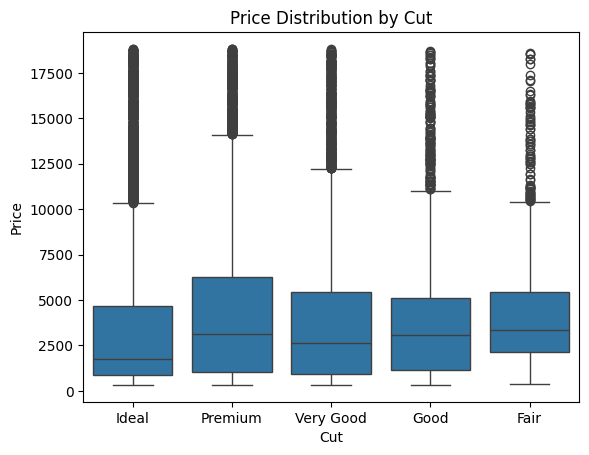

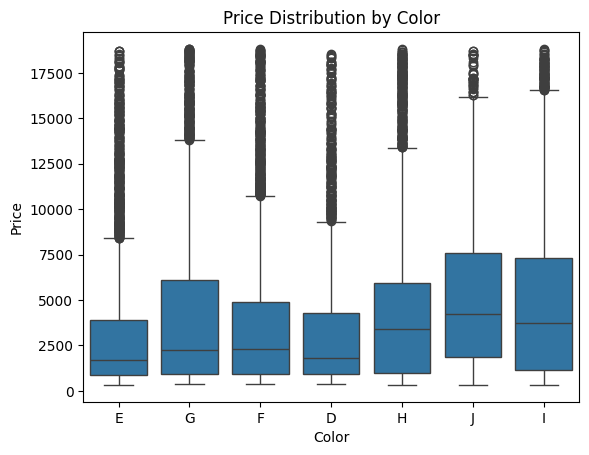

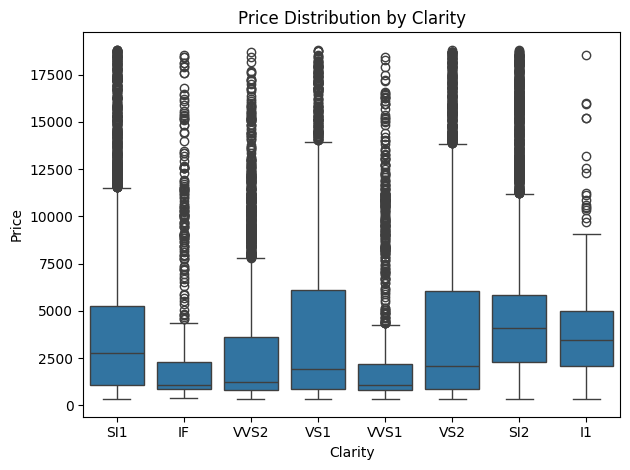

In [143]:
# Box plot: Price vs Cut

sns.boxplot(data=df, x='Cut', y='Price')
plt.title('Price Distribution by Cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

# Box plot: Price vs Color

sns.boxplot(data=df, x='Color', y='Price')
plt.title('Price Distribution by Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()

# Box plot: Price vs Clarity

sns.boxplot(data=df, x='Clarity', y='Price')
plt.title('Price Distribution by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


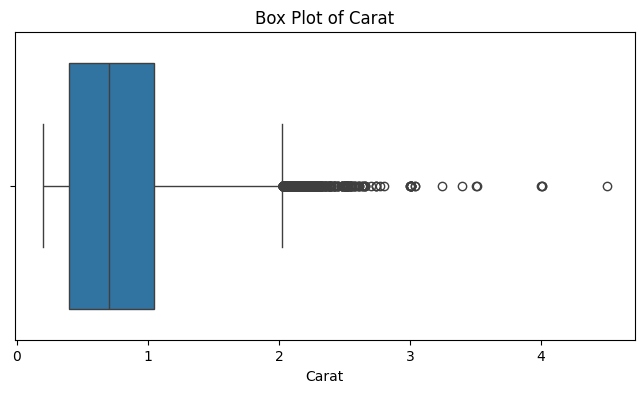

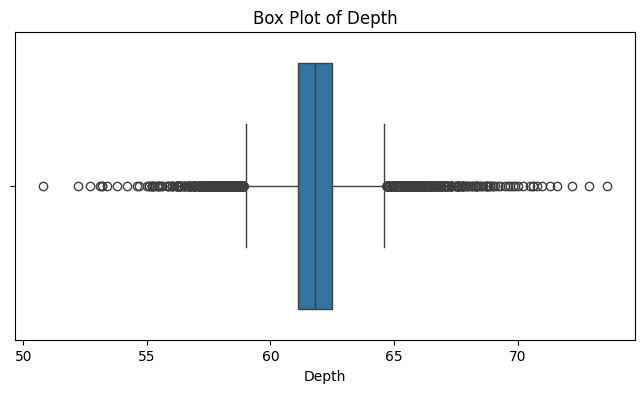

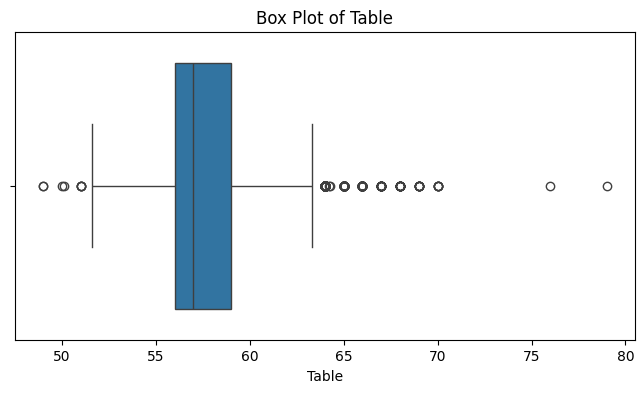

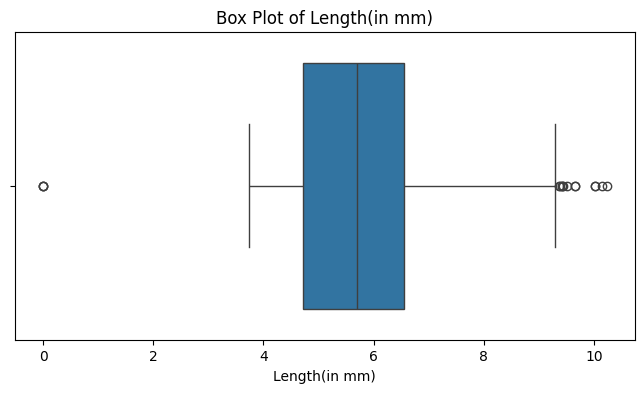

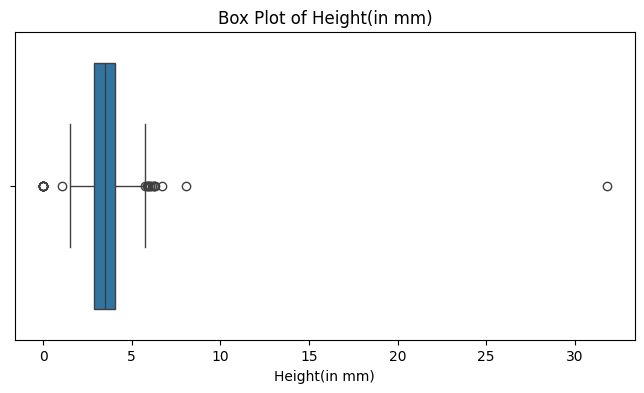

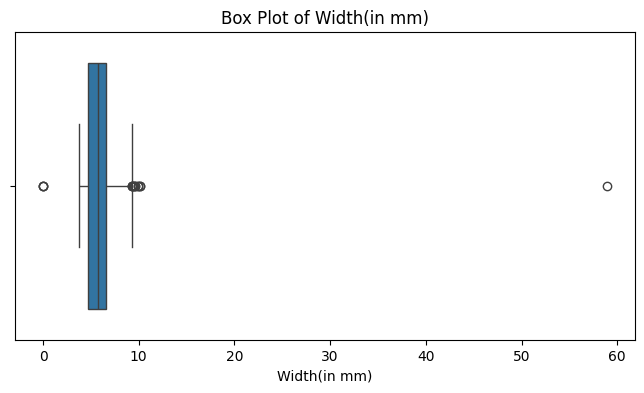

In [144]:
# List of numerical columns
num_cols = ['Carat', 'Depth', 'Table', 'Length(in mm)', 'Height(in mm)', 'Width(in mm)']

# Create box plots for each column
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

# Observations: 
### Categorical Box Plots:
- Price Distribution by Cut:

Premium cut appears to have a higher price range compared to other cuts.
Significant outliers are present for each cut quality.

- Price Distribution by Color:

There’s a clear price variation based on color, with some colors (e.g., J) showing higher price ranges.
Outliers are present in all categories.
- Price Distribution by Clarity:

Higher clarity levels (e.g., VVS2, VS1) are associated with higher prices.
Outliers are present, especially in lower clarity levels.

### Numerical Box Plots:
- Carat:

Outliers are observed beyond the 75th percentile, especially for carat values above 2.
- Depth, Table:

- Both features exhibit a few outliers at the extremes.
Length, Width, Height:

Extreme outliers are visible, especially for length and height, which could be data entry errors (e.g., very low or very high values).

## Strategy to Handle the Outliers: 

### I decided to go with the method Capping Strategy because is:

- Outliers often represent valuable information, especially in pricing data where extreme values might reflect genuinely expensive gemstones. Removing them outright could lead to loss of useful insights.
- With a dataset of 26,967 rows, removing too many rows due to outliers might unnecessarily reduce your sample size.
- Capping prevents extreme values from disproportionately influencing the regression model.

In [145]:
# List of numerical columns to process

numerical_cols = ['Carat', 'Depth', 'Table', 'Length(in mm)', 'Height(in mm)', 'Width(in mm)']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column: {col}, Outliers: {len(outliers)}")


Column: Carat, Outliers: 662
Column: Depth, Outliers: 1419
Column: Table, Outliers: 318
Column: Length(in mm), Outliers: 15
Column: Height(in mm), Outliers: 23
Column: Width(in mm), Outliers: 15


In [146]:
# Capping outliers

numerical_cols = ['Carat', 'Depth', 'Table', 'Length(in mm)', 'Height(in mm)', 'Width(in mm)']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

     # Cap the outliers

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

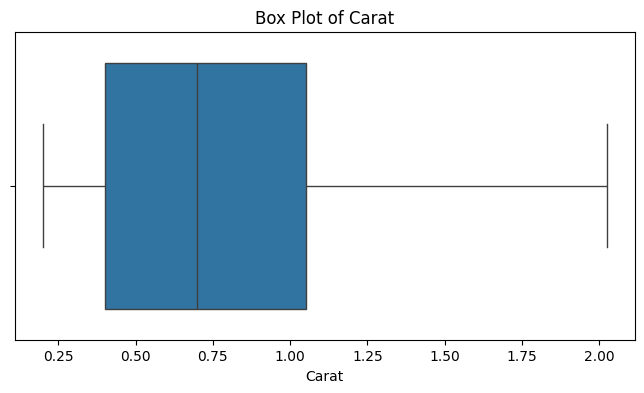

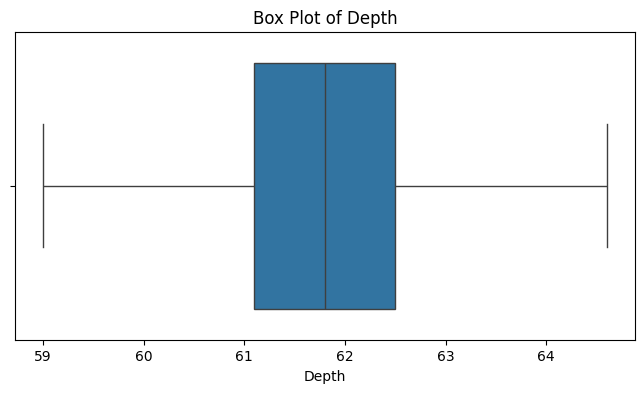

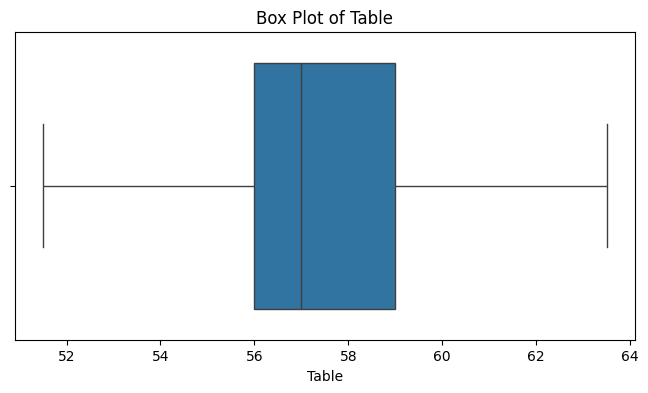

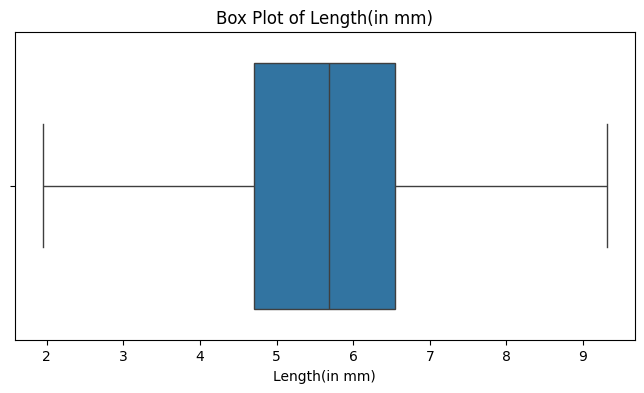

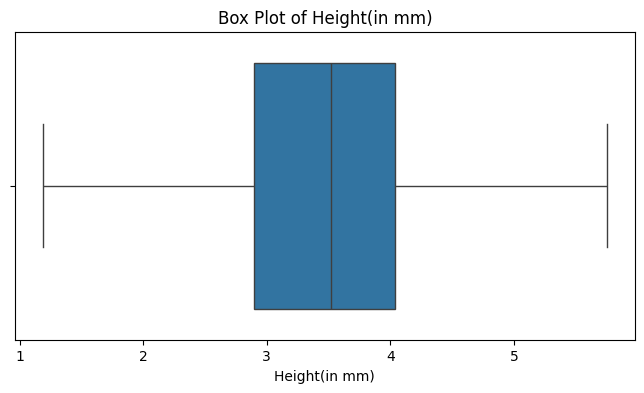

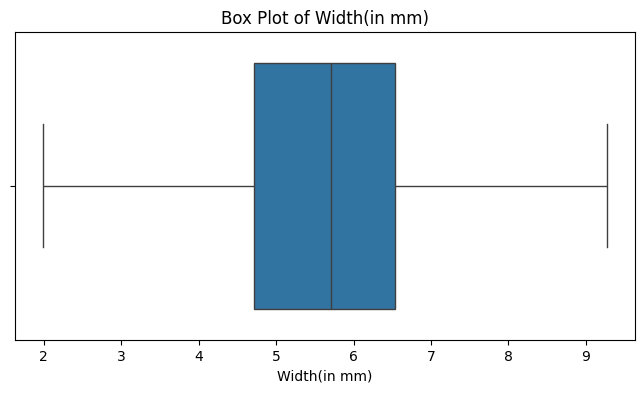

In [147]:
# List of numerical columns

numerical_cols = ['Carat', 'Depth', 'Table', 'Length(in mm)', 'Height(in mm)', 'Width(in mm)']

# Create box plots for each column

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

# Box Plot Analysis After Capping:
### Carat:

- The range of values is now well-defined and within acceptable bounds.
- Outliers have been effectively capped, ensuring a cleaner dataset.
### Depth:

- The majority of the values are concentrated around the median.
- Extreme values that previously existed have been capped, reducing skewness.
### Table:

- A more uniform distribution is now evident without extreme values.
- Capping has successfully removed significant outliers.
### Length, Height, and Width:

- The plots for these dimensions reflect realistic boundaries after capping.
- No extreme outliers remain, ensuring the data is ready for further analysis.

# Step 4 - EDA:

In [148]:
# Generate summary statistics for numerical columns

numerical_summary = df.describe()
numerical_summary

,Carat,Depth,Table,Length(in mm),Width(in mm),Height(in mm),Price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.793615,61.750428,57.435922,5.729872,5.731743,3.537208,3939.518115
std,0.462391,1.218835,2.156926,1.126918,1.118646,0.697144,4024.864666
min,0.200000,59.000000,51.500000,1.950000,1.990000,1.190000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,2.025000,64.600000,63.500000,9.310000,9.270000,5.750000,18818.000000


In [149]:
# Generate summary statistics for categorical columns

categorical_summary = df.describe(include=['object'])
categorical_summary

,Cut,Color,Clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10819,5664,6571


## Summary Statistics for numerical Columns:
### Mean:
- Carat weight is approximately 0.79.
- Depth is centered around 61.75%.
- Table width averages at 57.44%.
- Dimensions (Length, Width, and Height) are close to their mid-ranges.
- Price averages at $3,939.52.
### Standard Deviation:
- Carat and price have notable variance.
- Dimensions (Length, Width, Height) have lower variance, suggesting uniform sizing.
### Min, 25th Percentile, Median, 75th Percentile, Max:
- Carat ranges from 0.2 to 2.025.
- Price ranges significantly from $326 to $18,818.
- Depth and table mostly hover around their median, with a slight variation at extremes.
## Summary Statistics for categorical Columns:
### Cut:
- Most frequent: Ideal (10,814 occurrences).
- Total unique values: 5 (Ideal, Premium, Very Good, Good, Fair).
### Color:
- Most frequent: G (5,661 occurrences).
- Total unique values: 7 (D, E, F, G, H, I, J).
### Clarity:
- Most frequent: SI1 (6,571 occurrences).
- Total unique values: 8 (FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2).

# Historgram to see the distribution of the numerical features

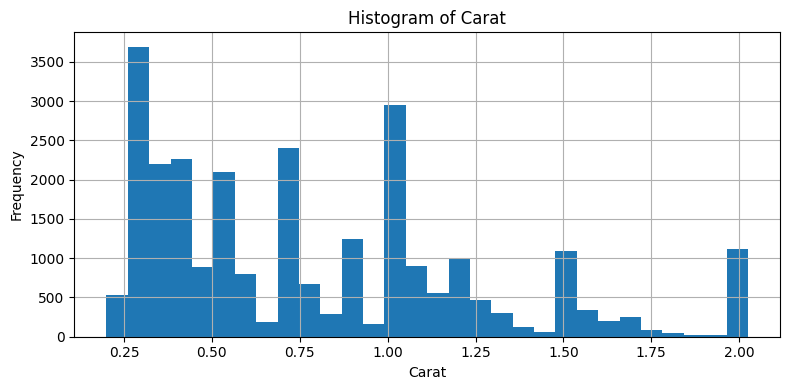

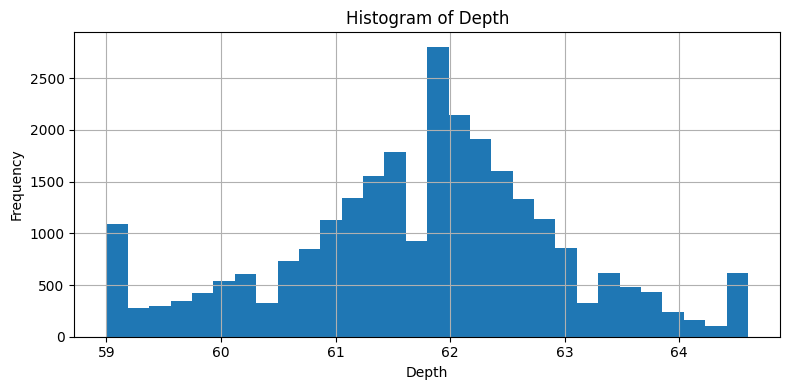

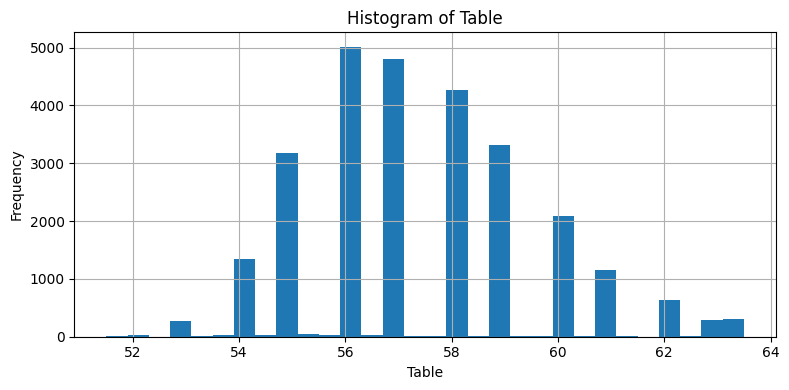

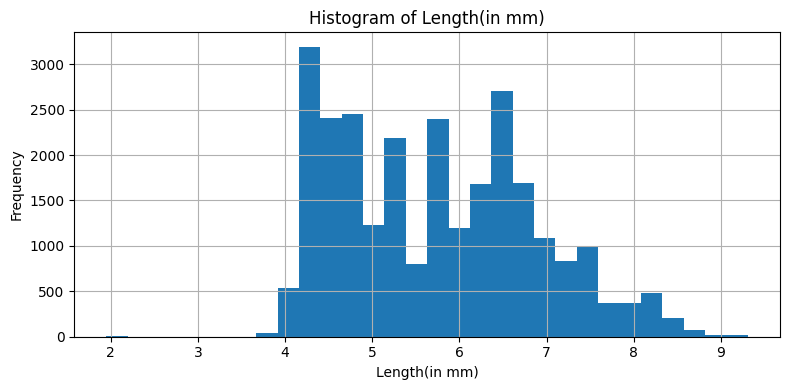

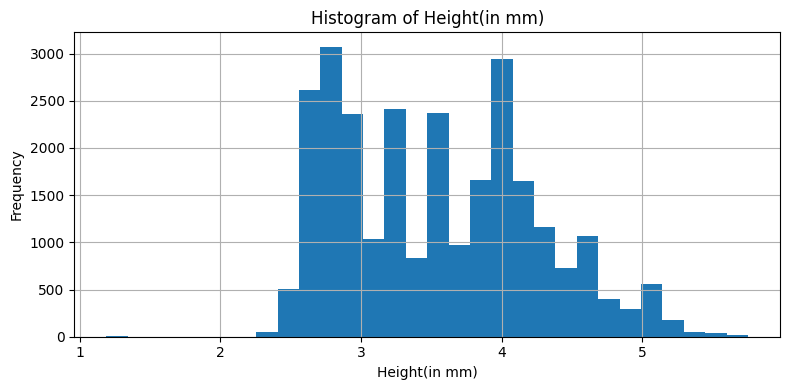

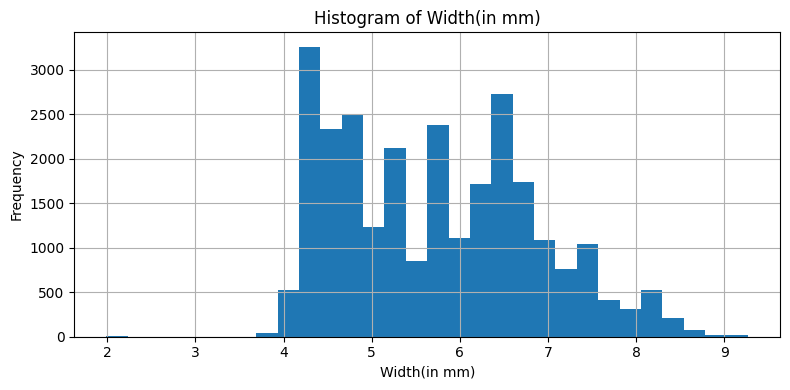

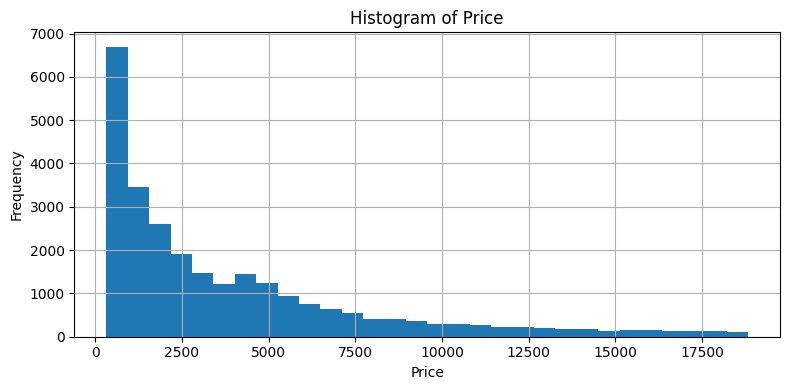

In [150]:
num_cols = ['Carat', 'Depth', 'Table', 'Length(in mm)', 'Height(in mm)', 'Width(in mm)', 'Price']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    df[col].hist(bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


# Bar plots to see the distribution of the categorical features

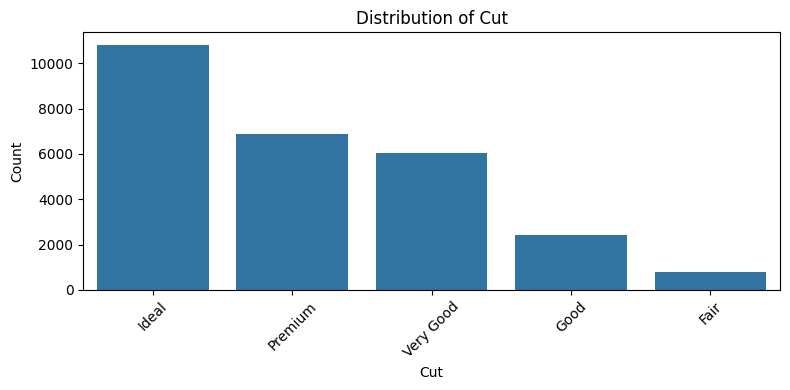

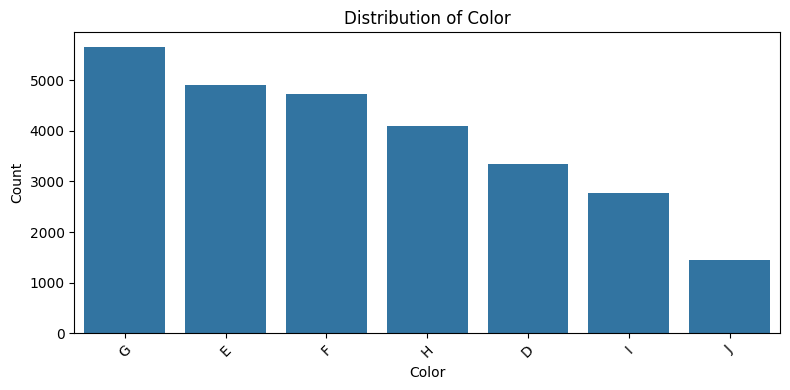

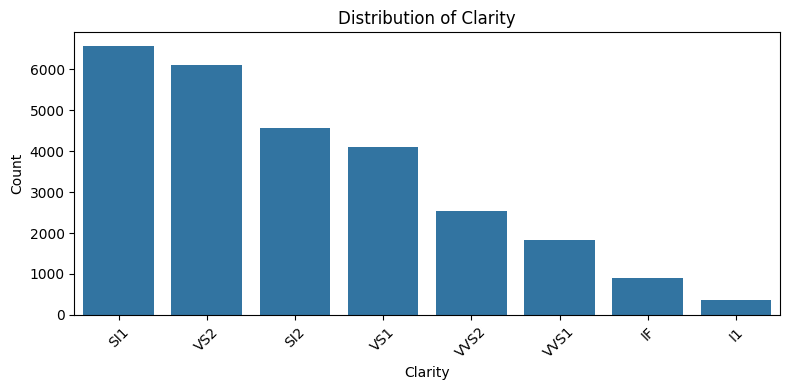

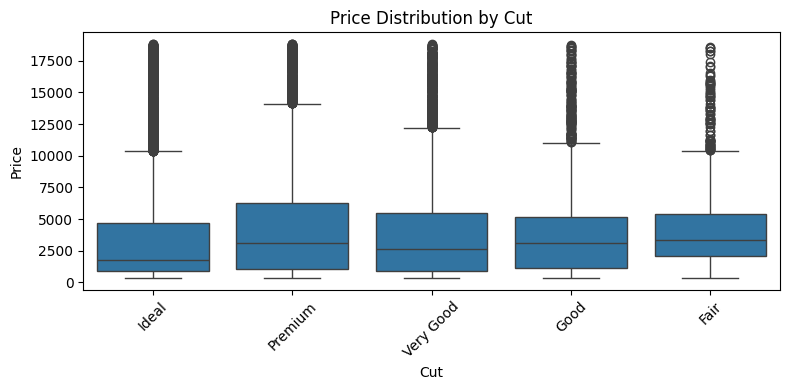

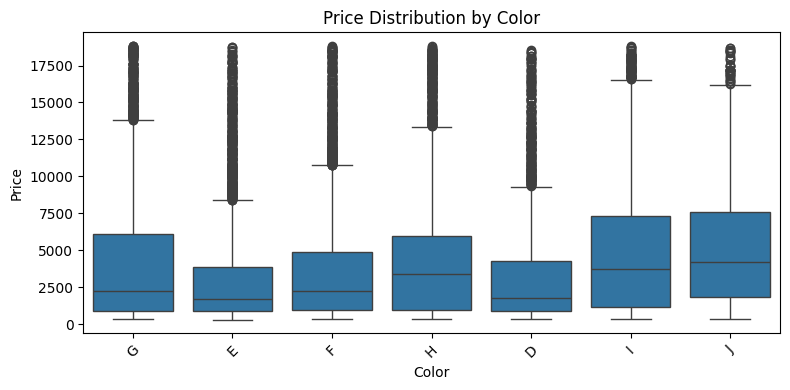

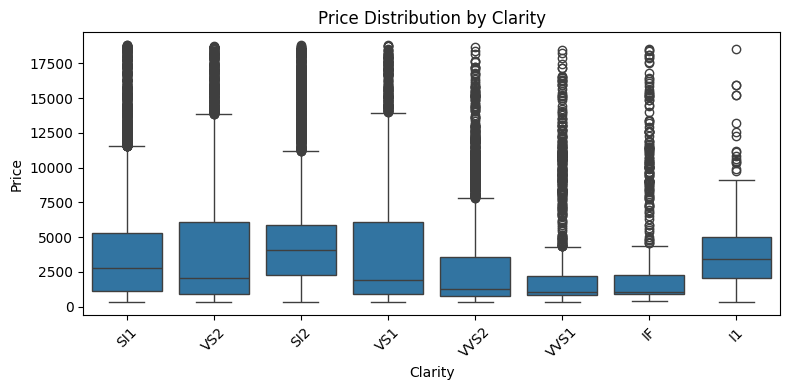

In [151]:
# Categorical columns

categorical_cols = ['Cut', 'Color', 'Clarity']

# Distribution of each categorical variable

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Box plots to analyze the relationship between categorical variables and Price

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col, y='Price', order=df[col].value_counts().index)
    plt.title(f"Price Distribution by {col}")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Key Insights Distribution of Cut, Color, and Clarity:
- Cut: The 'Ideal' cut dominates the dataset, followed by 'Premium' and 'Very Good'. This indicates that most diamonds are of high or moderate quality in terms of cut.
- Color: 'G' is the most frequent color grade, followed by 'E' and 'F', indicating that the dataset contains many diamonds with near-colorless grades.
- Clarity: 'SI1' and 'VS2' are the most common clarity grades, suggesting that the dataset leans towards moderately included diamonds.
- Price Distribution by Categorical Features:
- Cut: Diamonds with an 'Ideal' cut have a higher median price compared to other cuts, but there is significant overlap in price ranges across all categories.
- Color: The median price increases as the color grade worsens from 'G' to 'J', indicating a potential trend where lower-quality colors may be priced higher due to rarity or market demand.
- Clarity: 'IF' and 'VVS1' diamonds have the highest median prices, as expected for higher clarity grades.

### Correlation between the numerical features

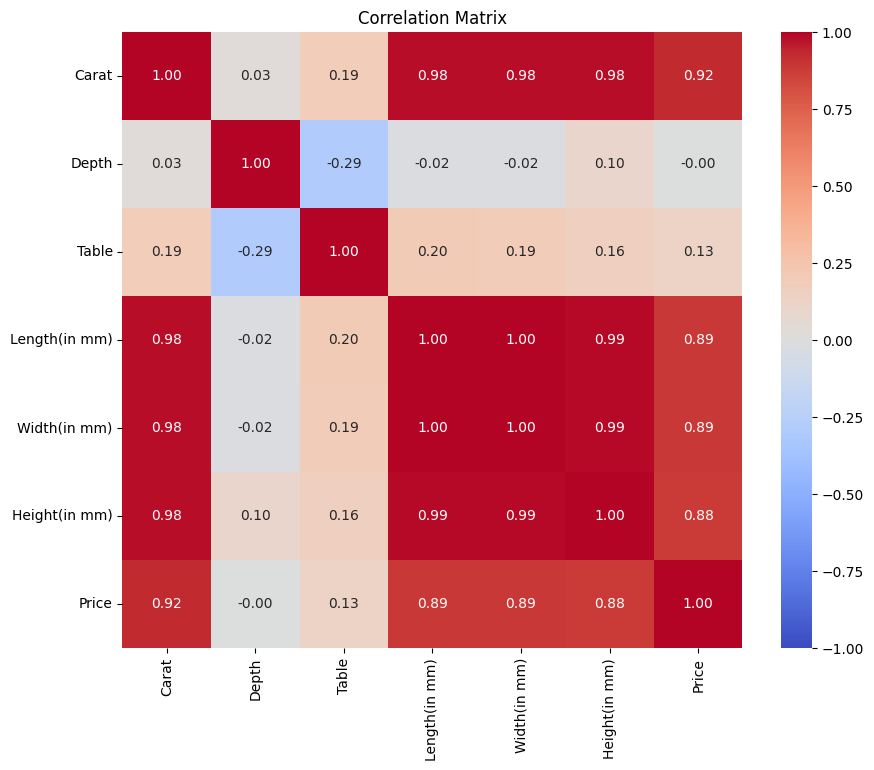

In [152]:
# Filter numeric columns only

numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix

correlation_matrix = numeric_df.corr()

# Plot heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

## Key Observations:
### High Correlations:
- Carat has a strong positive correlation with Length(in mm), Width(in mm), and Height(in mm) (around 0.98), as expected since carat weight is closely tied to physical dimensions.
- Price shows the strongest correlation with Carat (0.92), followed by the dimensions (Length(in mm), Width(in mm), and Height(in mm)), which are also above 0.88.

### Weak or No Correlation:
- Depth has almost no correlation with Price or the other features, making it a potential candidate for feature elimination.
- Table has a low correlation with Price (0.13), suggesting it has limited predictive power.

### Collinearity:
- Length(in mm), Width(in mm), and Height(in mm) are extremely correlated with each other (near 0.99), indicating high redundancy. This suggests dimensionality reduction or retaining only one of these features may be beneficial.

# Step 5 - Data Wrangling:

- Feature Engineering (Encoding Categorical Data)

In [153]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order for cut and clarity

cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# Create OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[cut_order, clarity_order])

# Encode 'cut' and 'clarity'

df[['Cut', 'Clarity']] = ordinal_encoder.fit_transform(df[['Cut', 'Clarity']])

In [154]:
# One-Hot Encode 'color'

df = pd.get_dummies(df, columns=['Color'], prefix='Color', drop_first=True)

# Check the updated dataset

print(df.head())

   Carat  Cut  Clarity  Depth  Table  Length(in mm)  Width(in mm)  \
0   0.30  4.0      2.0   62.1   58.0           4.27          4.29   
1   0.33  3.0      7.0   60.8   58.0           4.42          4.46   
2   0.90  2.0      5.0   62.2   60.0           6.04          6.12   
3   0.42  4.0      4.0   61.6   56.0           4.82          4.80   
4   0.31  4.0      6.0   60.4   59.0           4.35          4.43   

   Height(in mm)  Price  Color_E  Color_F  Color_G  Color_H  Color_I  Color_J  
0           2.66    499     True    False    False    False    False    False  
1           2.70    984    False    False     True    False    False    False  
2           3.78   6289     True    False    False    False    False    False  
3           2.96   1082    False     True    False    False    False    False  
4           2.65    779    False     True    False    False    False    False  


## Scatter Plots to relationship between price and carat and some features

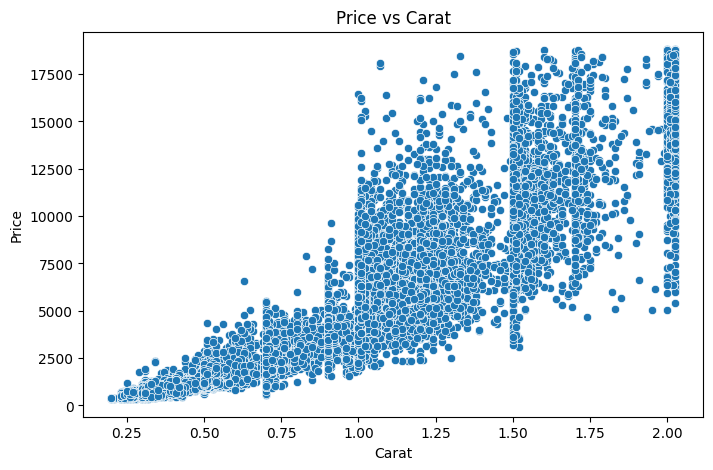

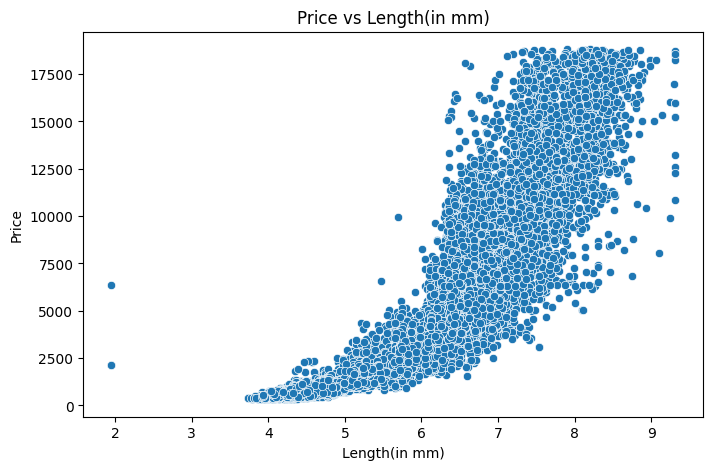

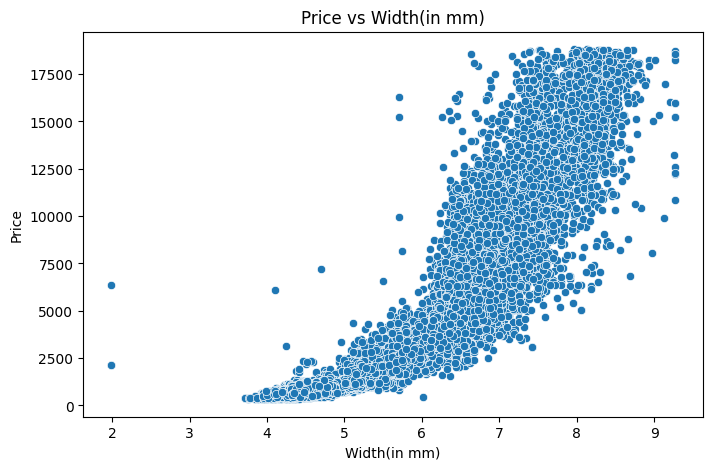

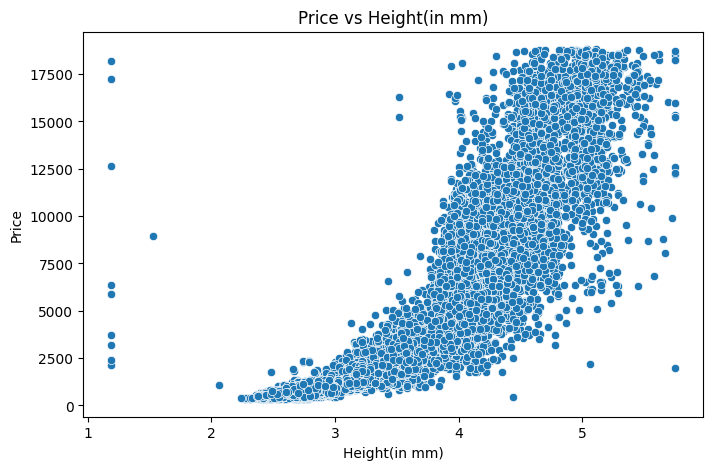

In [155]:
# Scatter plot: price vs carat

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Carat', y='Price')
plt.title('Price vs Carat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

# Scatter plot: price vs Lengght

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Length(in mm)', y='Price')
plt.title('Price vs Length(in mm)')
plt.xlabel('Length(in mm)')
plt.ylabel('Price')
plt.show()

# Scatter plot: Price vs Width(in mm)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Width(in mm)', y='Price')
plt.title('Price vs Width(in mm)')
plt.xlabel('Width(in mm)')
plt.ylabel('Price')
plt.show()

# Scatter plot: Price vs Height(in mm)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Height(in mm)', y='Price')
plt.title('Price vs Height(in mm)')
plt.xlabel('Height(in mm)')
plt.ylabel('Price')
plt.show()


## Observation
- Price vs Carat: This is a positive correlaction, confirming that larger carat stones are usually more valuable
- Price vs Lenght, Width and Height: all three dimension have the same positive relationship, I will create a new feature dimension (volume) to reduce redundancy in the Dataset

In [156]:
# Calculate volume

df['Volume (in mm)'] = df['Length(in mm)'] * df['Width(in mm)'] * df['Height(in mm)']

# Check the updated dataset

print(df.head())


   Carat  Cut  Clarity  Depth  Table  Length(in mm)  Width(in mm)  \
0   0.30  4.0      2.0   62.1   58.0           4.27          4.29   
1   0.33  3.0      7.0   60.8   58.0           4.42          4.46   
2   0.90  2.0      5.0   62.2   60.0           6.04          6.12   
3   0.42  4.0      4.0   61.6   56.0           4.82          4.80   
4   0.31  4.0      6.0   60.4   59.0           4.35          4.43   

   Height(in mm)  Price  Color_E  Color_F  Color_G  Color_H  Color_I  Color_J  \
0           2.66    499     True    False    False    False    False    False   
1           2.70    984    False    False     True    False    False    False   
2           3.78   6289     True    False    False    False    False    False   
3           2.96   1082    False     True    False    False    False    False   
4           2.65    779    False     True    False    False    False    False   

   Volume (in mm)  
0       48.726678  
1       53.225640  
2      139.726944  
3       68.482560 

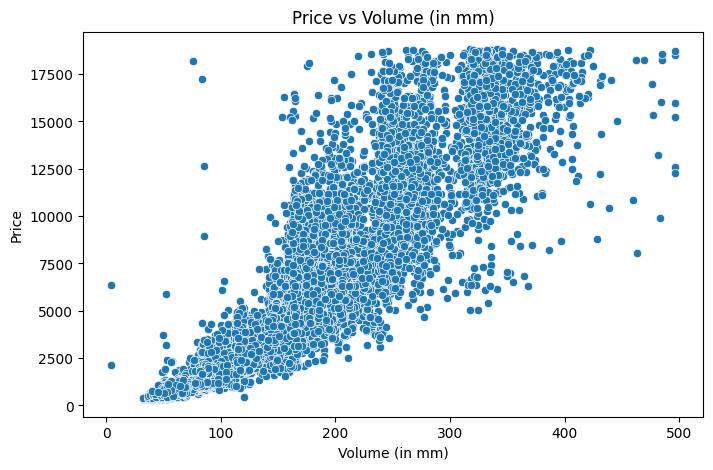

In [157]:
# Scatter plot: price vs volume
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Volume (in mm)', y='Price')
plt.title('Price vs Volume (in mm)')
plt.xlabel('Volume (in mm)')
plt.ylabel('Price')
plt.show()


In [161]:
correlation = df['Volume (in mm)'].corr(df['Price'])
print(f"Correlation between Volume (in mm) and Price: {correlation}")


Correlation between Volume (in mm) and Price: 0.9240476524372668


### The high correlation value of 0.92 between Volume (in mm) and Price confirms a very strong positive linear relationship. This means that as the gemstone's volume increases, its price also tends to increase significantly.

- Standarizing the features

In [162]:
from sklearn.preprocessing import StandardScaler

# Features to standardize
features_to_scale = ['Carat', 'Depth', 'Table', 'Length(in mm)', 'Height(in mm)', 'Width(in mm)', 'Volume (in mm)', 'Price']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Check scaled features
print(df[features_to_scale].describe())


              Carat         Depth         Table  Length(in mm)  Height(in mm)  \
count  2.696700e+04  2.696700e+04  2.696700e+04   2.696700e+04   2.696700e+04   
mean  -1.387254e-16 -2.778724e-15 -1.235354e-15  -7.838709e-17  -5.840168e-16   
std    1.000019e+00  1.000019e+00  1.000019e+00   1.000019e+00   1.000019e+00   
min   -1.283819e+00 -2.256646e+00 -2.752080e+00  -3.354229e+00  -3.366954e+00   
25%   -8.512762e-01 -5.336575e-01 -6.657384e-01  -9.050268e-01  -9.140436e-01   
50%   -2.024626e-01  4.067213e-02 -2.021070e-01  -3.538249e-02  -2.468413e-02   
75%    5.544866e-01  6.150017e-01  7.251559e-01   7.277748e-01   7.212302e-01   
max    2.663131e+00  2.337991e+00  2.811497e+00   3.176977e+00   3.174141e+00   

       Width(in mm)  Volume (in mm)         Price  
count  2.696700e+04    2.696700e+04  2.696700e+04  
mean   7.728045e-16   -1.252876e-16 -3.636107e-17  
std    1.000019e+00    1.000019e+00  1.000019e+00  
min   -3.344948e+00   -1.628813e+00 -8.978153e-01  
25%   -9.0

## Recap of Data Wrangling
### Data Cleaning:
- Outliers were capped using the IQR method.
- Unnecessary columns (e.g., Unnamed: 0) were dropped.
- Missing values, if any, were handled appropriately.

### Feature Engineering:
- A new Volume feature was created and analyzed for its strong correlation with Price.
- Redundant features (e.g., Length, Width, Height) were retained but supplemented with Volume for better predictive power.

### Encoding Categorical Variables:
- Ordinal encoding was applied for ordered categories (Cut and Clarity).
- One-hot encoding was applied to Color.

###  Feature Scaling:

All numerical features, including Price, were standardized to improve model performance.

# Step 6 - Building a Regression Model:

- Splitting the Dataset

In [163]:
# Define features (X) and target (y)
X = df.drop(columns=['Price'])  # Drop target and unrelated columns
y = df['Price']

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print sizes of training and testing sets
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (21573, 15)
Testing set size: (5394, 15)


- Training and Visualization of the first Regression Model 

Training Set Performance:
  RMSE: 0.28
  MAE: 0.18
  R²: 0.92

Testing Set Performance:
  RMSE: 0.28
  MAE: 0.19
  R²: 0.92


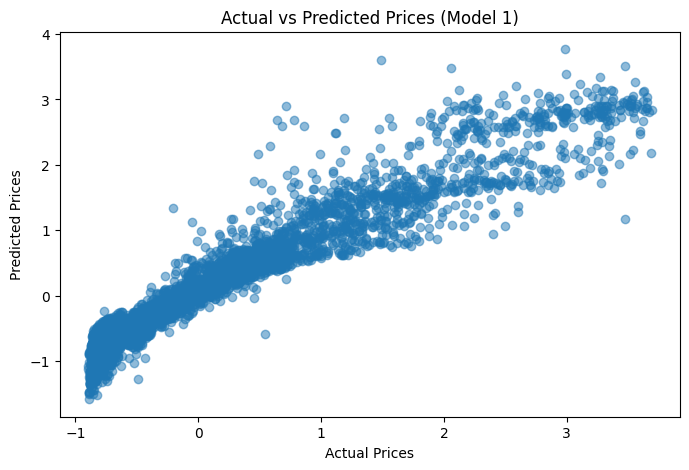

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the training set to check initial performance
y_train_pred = model.predict(X_train)

# Predict on the testing set
y_test_pred = model.predict(X_test)

# Evaluate the model
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print(f"Training Set Performance:")
print(f"  RMSE: {rmse_train:.2f}")
print(f"  MAE: {mae_train:.2f}")
print(f"  R²: {r2_train:.2f}\n")

print(f"Testing Set Performance:")
print(f"  RMSE: {rmse_test:.2f}")
print(f"  MAE: {mae_test:.2f}")
print(f"  R²: {r2_test:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.title('Actual vs Predicted Prices (Model 1)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


## Analysis of the Model
- High R² Score: A score of 0.92 suggests the model is capturing the majority of the variance in the data.
- Low Errors: Both RMSE and MAE are quite low after standardizing the features, indicating accurate predictions.

- Visualization of the Linear Regression Model

## Observations:
### Tight Cluster Around the Diagonal:
- My plot shows a strong alignment with the diagonal, indicating that the model predicts prices well.

### Spread of Points:
- There is some deviation from the diagonal at higher price ranges (e.g., near 3). This indicates that my model struggles slightly with extreme price values.
### Outliers:
- Some points are scattered far away from the diagonal, which may represent cases where the model's predictions are significantly off.
### Insights:
- The model's overall performance is strong, as most points align closely with the diagonal.
- The deviations at higher values could be addressed by:
- I will use another model to compare and see which works better

## Insights from Feature Importance
- Dominant Features: Clearly, Carat and Volume (in mm) are the most important features, as their bars are the longest. These features play a significant role in predicting the price.
- Least Important Features: Features like Color variations (e.g., Color_J, Color_I) contribute minimally.
- Other Relevant Features: Features such as Clarity, Width(in mm), and Height(in mm) also provide meaningful, but lesser, contributions.
- I will drop colors, depth and cut since they have very low importance

- Dropping some features less importance features

In [88]:
# Drop less important features
drop_features = ['Cut', 'Color_E', 'Color_F', 'Color_G', 'Color_H', 'Color_I', 'Color_J']
X_updated = X.drop(columns=drop_features)

# Confirm the shape of the updated dataset
print(f"Updated feature set shape: {X_updated.shape}")

Updated feature set shape: (26967, 8)


- Splitting the data again

In [166]:
# Split into training and testing sets
X_train_updated, X_test_updated, y_train, y_test = train_test_split(X_updated, y, test_size=0.2, random_state=42)



- Retraining the Model

In [167]:
# Initialize the Linear Regression model
lr_model_updated = LinearRegression()

# Train the model
lr_model_updated.fit(X_train_updated, y_train)


LinearRegression()

- Evaluating and visualization of the second Linear Regression Model

Updated Linear Regression Training Set Performance:
  RMSE: 0.31
  MAE: 0.21
  R²: 0.90

Updated Linear Regression Testing Set Performance:
  RMSE: 0.32
  MAE: 0.21
  R²: 0.90


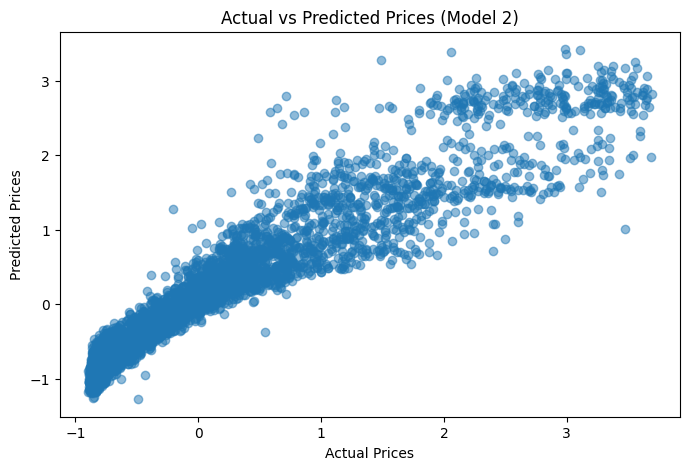

In [168]:
# Predict on training and testing sets
y_train_pred_updated = lr_model_updated.predict(X_train_updated)
y_test_pred_updated = lr_model_updated.predict(X_test_updated)

# Evaluate the model
rmse_train_updated = np.sqrt(mean_squared_error(y_train, y_train_pred_updated))
mae_train_updated = mean_absolute_error(y_train, y_train_pred_updated)
r2_train_updated = r2_score(y_train, y_train_pred_updated)

rmse_test_updated = np.sqrt(mean_squared_error(y_test, y_test_pred_updated))
mae_test_updated = mean_absolute_error(y_test, y_test_pred_updated)
r2_test_updated = r2_score(y_test, y_test_pred_updated)

# Print results
print(f"Updated Linear Regression Training Set Performance:")
print(f"  RMSE: {rmse_train_updated:.2f}")
print(f"  MAE: {mae_train_updated:.2f}")
print(f"  R²: {r2_train_updated:.2f}\n")

print(f"Updated Linear Regression Testing Set Performance:")
print(f"  RMSE: {rmse_test_updated:.2f}")
print(f"  MAE: {mae_test_updated:.2f}")
print(f"  R²: {r2_test_updated:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred_updated, alpha=0.5)
plt.title('Actual vs Predicted Prices (Model 2)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


## Observations:
### Lower R² Score:
- The updated model's R² dropped slightly (from 0.92 to 0.90), meaning it explains less variance in the data.

### Higher RMSE and MAE:
- Both RMSE (root mean squared error) and MAE (mean absolute error) increased slightly, indicating the updated model is less accurate in predicting gemstone prices.

### Dropping Feature?
- So maybe dropping feature was not the best decision because even if the feature has less importance, the combination of those feature can still be relevant.

## Regulation Techniques:

- Lasso regression will add a penalty to the absolute value of the coefficients, encouraging sparsity and reducing less important feature weights to zero.

Lasso Regression Training Set Performance:
  RMSE: 0.31
  MAE: 0.21
  R²: 0.90

Lasso Regression Testing Set Performance:
  RMSE: 0.32
  MAE: 0.22
  R²: 0.90
           Feature  Coefficient
14  Volume (in mm)     0.536819
0            Carat     0.467905
2          Clarity     0.114710
1              Cut     0.025839
8          Color_E     0.010420
3            Depth    -0.000000
4            Table    -0.000000
6     Width(in mm)    -0.000000
5    Length(in mm)    -0.000000
9          Color_F     0.000000
7    Height(in mm)    -0.000000
10         Color_G    -0.000000
11         Color_H    -0.053251
12         Color_I    -0.119639
13         Color_J    -0.219241


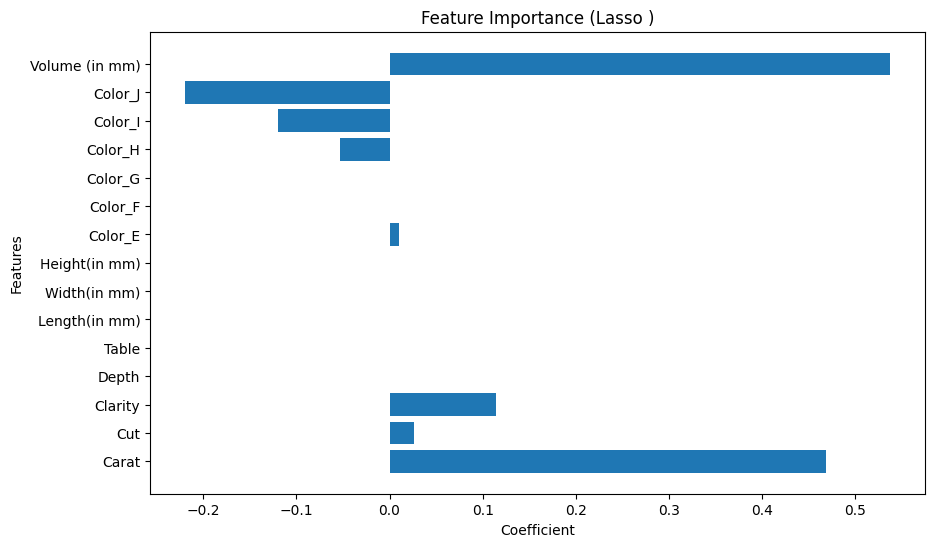

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the Lasso model

lasso = Lasso()

# hyperparameter grid for alpha

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to find the best alpha

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best Lasso model

best_lasso = grid_search.best_estimator_

# Predict using the best model

y_train_pred_lasso = best_lasso.predict(X_train)
y_test_pred_lasso = best_lasso.predict(X_test)

# Evaluate the model

rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Print results

print(f"Lasso Regression Training Set Performance:")
print(f"  RMSE: {rmse_train_lasso:.2f}")
print(f"  MAE: {mae_train_lasso:.2f}")
print(f"  R²: {r2_train_lasso:.2f}\n")

print(f"Lasso Regression Testing Set Performance:")
print(f"  RMSE: {rmse_test_lasso:.2f}")
print(f"  MAE: {mae_test_lasso:.2f}")
print(f"  R²: {r2_test_lasso:.2f}")

# Feature importance

lasso_coef = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': best_lasso.coef_})
print(lasso_coef.sort_values(by='Coefficient', ascending=False))

# Visualize feature importance

plt.figure(figsize=(10, 6))
plt.barh(lasso_coef['Feature'], lasso_coef['Coefficient'])
plt.title('Feature Importance (Lasso )')
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.show()


- Retrain the model but in a simpler version and visualize

Simpler Model Training Set Performance:
  RMSE: 0.30
  MAE: 0.21
  R²: 0.91

Simpler Model Testing Set Performance:
  RMSE: 0.31
  MAE: 0.22
  R²: 0.91


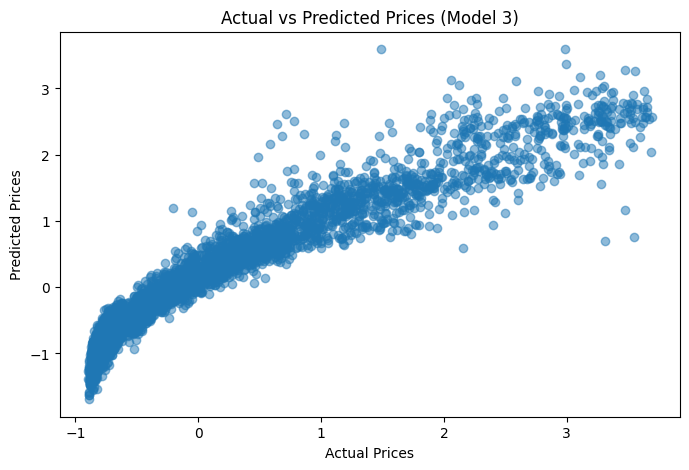

In [170]:
# Keep only important features
selected_features = ['Carat', 'Clarity', 'Cut', 'Volume (in mm)', 'Color_J', 'Color_I', 'Color_H']
X_simple = df[selected_features]
y = df['Price']

# Split the data into training and testing sets
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Retrain the Linear Regression model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)

# Predict on training and testing sets
y_train_pred_simple = simple_model.predict(X_train_simple)
y_test_pred_simple = simple_model.predict(X_test_simple)

# Evaluate the simpler model
rmse_train_simple = np.sqrt(mean_squared_error(y_train_simple, y_train_pred_simple))
mae_train_simple = mean_absolute_error(y_train_simple, y_train_pred_simple)
r2_train_simple = r2_score(y_train_simple, y_train_pred_simple)

rmse_test_simple = np.sqrt(mean_squared_error(y_test_simple, y_test_pred_simple))
mae_test_simple = mean_absolute_error(y_test_simple, y_test_pred_simple)
r2_test_simple = r2_score(y_test_simple, y_test_pred_simple)

# Print results
print(f"Simpler Model Training Set Performance:")
print(f"  RMSE: {rmse_train_simple:.2f}")
print(f"  MAE: {mae_train_simple:.2f}")
print(f"  R²: {r2_train_simple:.2f}\n")

print(f"Simpler Model Testing Set Performance:")
print(f"  RMSE: {rmse_test_simple:.2f}")
print(f"  MAE: {mae_test_simple:.2f}")
print(f"  R²: {r2_test_simple:.2f}")

# Visualize Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test_simple, y_test_pred_simple, alpha=0.5)
plt.title('Actual vs Predicted Prices (Model 3)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


- Cross Validation

In [171]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Evaluate the model using cross-validation
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {mean_cv_score:.2f}")
print(f"Standard Deviation of R² Scores: {std_cv_score:.2f}")


Cross-Validation R² Scores: [0.92633347 0.91145528 0.92051124 0.92573596 0.92087431 0.92200948
 0.9253046  0.93111846 0.91931777 0.92304208]
Mean R² Score: 0.92
Standard Deviation of R² Scores: 0.00


# Meaningful Insights:
- The feature importance analysis and regression coefficients show that volume (in mm) and carat are the strongest predictors of gemstone price.
- For the categorical features, clarity has an impact, the better clarity correlating with higher prices. Specific colors (e.g., Color_J, Color_I) negatively impact prices.
- Colors like E, F, G appear less impactful but may still influence customer preferences slightly.
- Scatterplots between price and dimensions (length, width, height) showed a strong positive relationship, leading to the creation of the volume feature. This feature encapsulated the individual effects of length, width, and height into a single meaningful metric.
- Residual analysis indicated that while the model captures general trends well, certain outliers exist. These outliers might represent unique cases (maybe defect or exceptional quality?)

# Recommendation Bases on the Analysis
- Focusing on the Carat and Volume, pricing can be standarized. That can make the prices can be more competitive.